# PRÉ PROCESSAMENTO DE DADOS 

In [860]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [861]:
df = pd.read_csv('../data/Heart-Disease-Dataset/heart.csv')

In [862]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [863]:
df['ST_Slope'].value_counts()


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [864]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

In [865]:
df['Sex'] = df['Sex'].replace({'M' : 1, 'F' : 0})
df['ChestPainType'] = df['ChestPainType'].replace({'ASY' : 0, 'NAP' : 1, 'ATA' : 2, 'TA' : 3})
df['RestingECG'] = df['RestingECG'].replace({'Normal' : 0, 'LVH' : 1, 'ST' : 2})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N' : 0, 'Y' : 1})
df['ST_Slope'] = df['ST_Slope'].replace({'Flat' : 0, 'Up' : 1, 'Down' : 2})

C:\Users\muril\AppData\Local\Temp\ipykernel_12416\4177478840.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M' : 1, 'F' : 0})
C:\Users\muril\AppData\Local\Temp\ipykernel_12416\4177478840.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'] = df['ChestPainType'].replace({'ASY' : 0, 'NAP' : 1, 'ATA' : 2, 'TA' : 3})
C:\Users\muril\AppData\Local\Temp\ipykernel_12416\4177478840.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

In [866]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.748366,132.396514,198.799564,0.233115,0.592593,136.809368,0.404139,0.887364,0.567538,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,1.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


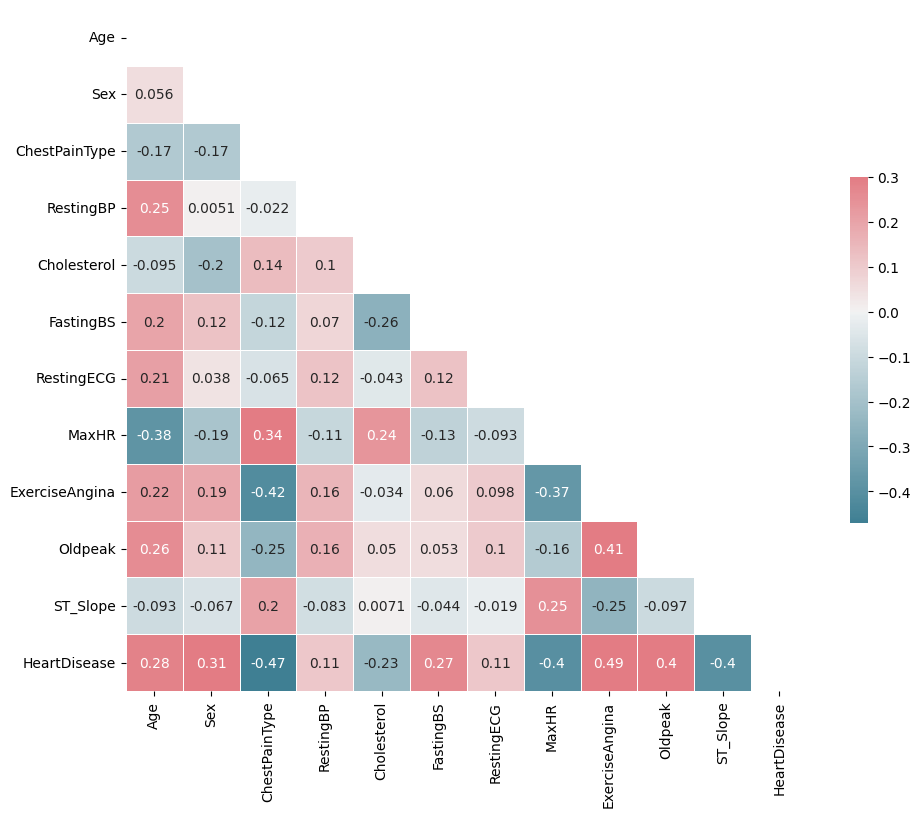

In [867]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [868]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0
5,39,1,1,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,0,140,207,0,0,130,1,1.5,0,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


# MODELO 

In [869]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [870]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']


In [871]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [872]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 1.03813138, -2.41139271,  1.19543353, ..., -0.76564149,
        -0.82051766,  0.57212054],
       [ 0.0050531 ,  0.41469811,  0.18179404, ..., -0.76564149,
        -0.82051766, -1.02288218],
       [ 1.24474703,  0.41469811, -0.83184545, ..., -0.76564149,
         0.38487355, -1.02288218],
       ...,
       [ 1.14143921,  0.41469811, -0.83184545, ...,  1.30609431,
         0.68622135, -1.02288218],
       [-0.40817821,  0.41469811,  1.19543353, ..., -0.76564149,
        -0.21782205,  0.57212054],
       [ 1.14143921,  0.41469811, -0.83184545, ...,  1.30609431,
         0.18397502, -1.02288218]])

In [873]:
model = Sequential([
  Dense(6, input_shape=(11,), activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  Dense(100, activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  Dense(100, activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  Dense(100, activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  Dense(100, activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')  
])

C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [874]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [875]:
model.fit(X_train, y_train,
          batch_size=30,
          epochs=50,
          verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5266 - loss: 0.8173
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 0.7170
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5640 - loss: 0.7104 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 0.7002 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 0.7202
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 0.6591
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 0.7110
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 0.6717 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5617 - loss: 0.6776
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 0.7042
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5505 - loss: 0.6924
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5286 -

In [876]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [877]:
y_pred_binary = (y_pred > 0.5).astype(int)


In [878]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [879]:
mlp = MLPClassifier(hidden_layer_sizes=(101,), max_iter=300, activation='relu', solver='adam', random_state=42)

In [880]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(101,), max_iter=300, random_state=42)

In [881]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [882]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [883]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous targets